In [2]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Scaling the data
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [3]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_row',None)

In [4]:
data = pd.read_csv('D:/SASTRA_AI_DS/MIni_project/Ovarian_Cancer_Diagnosis/Dataset/data_pre_meno.csv')

In [5]:
data.head()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.090,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.130,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
2,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.280,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
3,3.79,17.39,44,32.9,118.0,51.0,32.0,0.02,0.42,4.47,2.49,55.97,22.57,0.74,1.33,99.3,20.1,80.7,5.9,0.01,0.19,75.0,39.4,7.52,0.306,49.95,96.5,2.2,4.89,0.52,11.1,21.8,69.0,0,0.93,0.07,1.51,9.49,131.9,86.8,0.265,19.1,0.68,279,4.44,21.7,8.1,72.3,218.2,0
4,NaN,21.87,53,NaN,NaN,NaN,NaN,0.02,0.50,2.60,2.24,NaN,NaN,NaN,NaN,103.2,21.3,44.0,NaN,0.06,1.50,NaN,NaN,7.10,0.421,NaN,138.0,NaN,4.20,1.28,32.7,29.7,90.7,0,0.65,0.19,4.80,12.10,137.7,60.5,0.180,16.8,1.50,148,4.64,12.1,NaN,NaN,151.9,0


In [6]:
data.shape

(230, 50)

In [7]:
data['Menopause'].value_counts()

Menopause
0    230
Name: count, dtype: int64

In [8]:
data = data.drop('Menopause', axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFP     217 non-null    float64
 1   AG      229 non-null    float64
 2   Age     230 non-null    int64  
 3   ALB     220 non-null    float64
 4   ALP     220 non-null    float64
 5   ALT     220 non-null    float64
 6   AST     220 non-null    float64
 7   BASO#   230 non-null    float64
 8   BASO%   230 non-null    float64
 9   BUN     230 non-null    float64
 10  Ca      230 non-null    float64
 11  CA125   219 non-null    float64
 12  CA19-9  215 non-null    float64
 13  CA72-4  78 non-null     float64
 14  CEA     217 non-null    float64
 15  CL      230 non-null    float64
 16  CO2CP   229 non-null    float64
 17  CREA    230 non-null    float64
 18  DBIL    220 non-null    float64
 19  EO#     230 non-null    float64
 20  EO%     230 non-null    float64
 21  GGT     220 non-null    float64
 22  GL

In [10]:
data.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,217.000000,229.000000,230.000000,220.000000,220.000000,220.000000,220.000000,230.000000,230.000000,230.000000,230.000000,219.000000,215.000000,78.000000,217.000000,230.000000,229.000000,230.000000,220.000000,230.000000,230.000000,220.000000,220.000000,230.000000,230.000000,218.000000,230.00000,220.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,228.00000,230.000000,153.000000,228.000000,228.000000,230.000000,230.000000,230.000000,230.000000,220.000000,220.000000,230.000000,230.000000
mean,16.260415,19.363799,36.508696,41.745000,71.704545,17.781818,17.550000,0.029957,0.513087,3.764609,2.435696,155.584201,44.383256,5.425641,3.530783,100.768261,24.009170,63.600870,3.180000,0.069739,1.187957,20.018182,29.998636,5.061304,0.382570,91.628440,125.10913,5.865000,4.386130,1.628130,27.528957,28.639652,87.375652,0.983957,0.344870,5.545130,9.99614,139.976957,64.073399,0.242860,14.554167,1.113957,245.095652,4.375739,13.741826,9.045000,71.474091,233.604348,0.673913
std,120.412242,3.864685,9.956123,5.261545,51.480537,11.433654,7.318099,0.021280,0.365418,1.043799,0.268410,354.411240,124.187002,9.667364,12.958631,2.741034,2.482616,10.830198,1.416072,0.073970,1.234068,17.204641,4.384921,0.763539,0.039367,198.410868,14.94638,2.471759,0.378454,0.558693,10.018714,2.680921,6.024899,0.124548,0.144533,1.836457,1.72380,2.660259,11.032853,0.079997,2.847607,0.186904,76.666347,0.407983,1.921712,3.664132,7.211148,61.103937,0.469802
min,0.610000,6.700000,15.000000,23.500000,28.000000,5.000000,7.000000,0.000000,0.000000,1.250000,0.920000,5.940000,0.600000,0.200000,0.200000,88.800000,16.200000,38.200000,0.900000,0.000000,0.000000,4.000000,19.000000,3.570000,0.224000,16.710000,61.80000,1.000000,3.330000,0.380000,5.100000,18.100000,61.800000,0.650000,0.070000,0.300000,5.89000,125.100000,40.400000,0.070000,8.800000,0.650000,74.000000,2.640000,10.920000,2.500000,32.900000,96.000000,0.000000
25%,1.500000,17.300000,28.000000,39.175000,55.000000,11.000000,13.000000,0.010000,0.200000,3.087500,2.340000,17.655000,8.425000,0.845000,0.800000,99.200000,22.400000,56.000000,2.200000,0.020000,0.372500,11.000000,26.875000,4.602500,0.361000,40.040000,118.00000,4.000000,4.155000,1.222500,20.025000,27.920000,85.000000,0.902500,0.250000,4.200000,8.99000,138.600000,56.400000,0.190000,12.275000,0.990000,200.250000,4.140000,12.400000,6.375000,68.275000,197.125000,0.000000
50%,2.200000,19.750000,37.000000,42.600000,65.000000,14.500000,16.000000,0.030000,0.400000,3.745000,2.470000,35.980000,14.570000,2.135000,1.210000,100.700000,23.800000,63.000000,2.900000,0.050000,0.900000,15.000000,29.550000,4.955000,0.386000,45.970000,127.00000,5.500000,4.365000,1.575000,28.400000,29.300000,88.500000,0.970000,0.320000,5.500000,10.30000,140.100000,63.900000,0.239000,14.050000,1.110000,233.000000,4.385000,13.200000,8.400000,72.600000,226.400000,1.000000
75%,3.470000,21.870000,45.000000,45.625000,77.000000,20.000000,20.000000,0.040000,0.727500,4.367500,2.580000,95.045000,28.675000,5.790000,1.890000,102.500000,25.500000,70.000000,3.800000,0.090000,1.595000,22.000000,32.400000,5.397500,0.407750,57.015000,135.00000,7.200000,4.652500,1.957500,34.475000,30.375000,91.000000,1.050000,0.410000,6.592500,11.12500,141.675000,71.300000,0.290000,17.000000,1.230000,279.000000,4.657500,14.675000,10.900000,76.050000,264.950000,1.000000
max,1210.000000,33.330000,57.000000,51.500000,763.000000,86.000000,64.000000,0.120000,1.940000,7.840000,2.830000,2233.000000,1000.000000,64.880000,138.800000,108.100000,34.300000,103.000000,12.100000,0.400000,7.600000,120.000000,43.300000,8.980000,0.481000,1994.400000,156.00000,17.500000,5.390000,3.490000,51.600000,36.800000,107.900000,1.370000,0.970000,12.140000,14.00000,150.700000,89.800000,0.690000,22.800000,1.750000,7

In [11]:
data.isnull().sum()

AFP        13
AG          1
Age         0
ALB        10
ALP        10
ALT        10
AST        10
BASO#       0
BASO%       0
BUN         0
Ca          0
CA125      11
CA19-9     15
CA72-4    152
CEA        13
CL          0
CO2CP       1
CREA        0
DBIL       10
EO#         0
EO%         0
GGT        10
GLO        10
GLU.        0
HCT         0
HE4        12
HGB         0
IBIL       10
K           0
LYM#        0
LYM%        0
MCH         0
MCV         0
Mg          0
MONO#       0
MONO%       0
MPV         2
Na          0
NEU        77
PCT         2
PDW         2
PHOS        0
PLT         0
RBC         0
RDW         0
TBIL       10
TP         10
UA          0
TYPE        0
dtype: int64

In [12]:
data.shape

(230, 49)

In [36]:
age_type_df = data[['Age', 'TYPE', 'CA72-4', 'NEU']] 
#ca724_neu_df = data[['CA72-4','NEU']]

In [23]:
data_df = data.drop(columns=['Age', 'TYPE','CA72-4', 'NEU'])  

In [24]:
data_df.shape

(230, 45)

In [16]:
imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(imputer.fit_transform(data_df), columns=data_df.columns)

In [16]:
def remove_outliers_iqr(df):
    """
    Detect and truncate outliers using IQR method.
    Any value beyond 1.5 * IQR from the lower or upper quartile is considered an outlier
    and will be truncated to the respective bounds.
    """
    # Create a copy of the dataset
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.select_dtypes(include=[np.number]):  # Process only numeric columns
        Q1 = df_outliers_removed[column].quantile(0.25)  # 25th percentile (lower quartile)
        Q3 = df_outliers_removed[column].quantile(0.75)  # 75th percentile (upper quartile)
        IQR = Q3 - Q1  # Inter-quartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Truncate the outliers to the lower or upper bounds
        df_outliers_removed[column] = np.where(df_outliers_removed[column] < lower_bound, 
                                               lower_bound, 
                                               df_outliers_removed[column])
        df_outliers_removed[column] = np.where(df_outliers_removed[column] > upper_bound, 
                                               upper_bound, 
                                               df_outliers_removed[column])
    return df_outliers_removed

In [18]:
outliered_data_iqr = remove_outliers_iqr(data_knn_imputed)

<Axes: ylabel='AFP'>

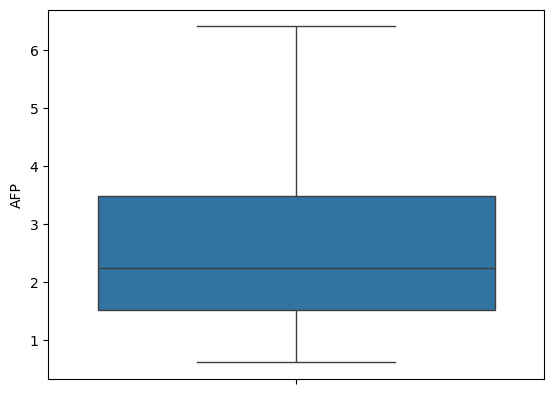

In [19]:
sns.boxplot(outliered_data_iqr['AFP'])

In [25]:
# Combine Age and Type columns with winsorized data
IQR_outlier_knn_imputer = pd.concat([outliered_data_iqr, age_type_df], axis=1)

In [26]:
IQR_outlier_knn_imputer

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,3.580,19.36,45.40,56.000,11.0,24.0,0.01,0.30,5.35,2.48,15.36000,36.480,1.400,107.40,19.9,91.0,2.00,0.040,1.00,16.0,28.50,4.67,0.290875,43.00200,92.5,3.50,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.5,73.9,366.6875,47,0,6.42,76.2
1,1.500,18.40,45.40,77.000,9.0,18.0,0.03,0.60,3.80,2.57,56.08000,12.180,0.770,102.60,22.2,48.0,4.70,0.030,0.60,10.0,32.50,4.64,0.391000,47.56000,131.0,10.10,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.8,77.9,209.2000,39,0,NaN,69.7
2,2.360,19.97,35.00,47.000,21.0,27.0,0.01,0.10,4.89,2.48,250.28125,11.150,0.420,99.60,26.2,70.3,2.20,0.110,1.60,24.0,31.50,4.07,0.383000,89.78875,122.0,3.10,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.3,66.5,206.0000,45,0,NaN,59.5
3,3.790,17.39,32.90,109.375,33.5,30.5,0.02,0.42,4.47,2.49,55.97000,22.570,1.330,99.30,20.1,80.7,5.90,0.010,0.19,37.0,39.40,6.59,0.306000,49.95000,96.5,2.20,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,0.265,19.1,0.68,279.000,4.44000,18.0875,8.1,72.3,218.2000,44,0,0.74,86.8
4,2.668,21.87,38.74,54.800,28.8,18.2,0.02,0.50,2.60,2.24,15.45200,8.352,1.424,103.20,21.3,44.0,3.48,0.060,1.50,22.8,30.86,6.59,0.421000,47.70000,138.0,7.42,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,0.180,16.8,1.50,148.000,4.64000,12.1000,10.9,69.6,151.9000,53,0,NaN,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.000,30.0,16.0,0.03,0.50,4.86,2.58,13.61000,8.370,0.590,96.50,24.6,67.0,2.90,0.060,1.10,29.0,25.80,4.39,0.440000,40.17000,147.0,4.80,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,0.230,13.2,1.07,210.000,4.83000,12.1000,7.7,74.4,366.6875,43,1,NaN,NaN
226,2.090,20.91,48.60,65.000,33.5,30.0,0.00,0.00,4.29,2.81,50.80000,15.110,1.740,98.10,25.9,54.0,3.80,0.010,0.30,36.0,31.80,5.13,0.415000,31.45000,142.0,6.90,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,0.220,10.8,0.99,219.000,4.56000,11.9000,10.7,80.4,241.5000,52,1,NaN,NaN
227,2.000,12.14,46.10,49.000,9.0,20.0,0.00,0.00,3.12,2.29,21.93000,0.620,1.670,103.60,25.0,67.0,5.90,0.020,0.30,9.0,27.40,4.59,0.290875,44.44000,92.5,11.30,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,0.310,17.3,0.95,262.000,4.24000,17.7000,17.2,73.5,240.5000,37,1,NaN,NaN
228,1.840,27.22,47.80,64.000,26.0,22.0,0.03,0.30,3.61,2.82,53.87000,10.710,0.930,94.25,23.1,59.0,3.50,0.195,2.20,25.0,28.20,5.59,0.458000,30.78000,154.0,7.80,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,0.420,13.4,1.31,397.125,5.35000,12.5000,11.3,76.0,285.7000,30,1,NaN,NaN


In [27]:
IQR_outlier_knn_imputer.isnull().sum()

AFP         0
AG          0
ALB         0
ALP         0
ALT         0
AST         0
BASO#       0
BASO%       0
BUN         0
Ca          0
CA125       0
CA19-9      0
CEA         0
CL          0
CO2CP       0
CREA        0
DBIL        0
EO#         0
EO%         0
GGT         0
GLO         0
GLU.        0
HCT         0
HE4         0
HGB         0
IBIL        0
K           0
LYM#        0
LYM%        0
MCH         0
MCV         0
Mg          0
MONO#       0
MONO%       0
MPV         0
Na          0
PCT         0
PDW         0
PHOS        0
PLT         0
RBC         0
RDW         0
TBIL        0
TP          0
UA          0
Age         0
TYPE        0
CA72-4    152
NEU        77
dtype: int64

In [28]:
imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(imputer.fit_transform(IQR_outlier_knn_imputer), columns=IQR_outlier_knn_imputer.columns)

In [29]:
outliered_data_iqr = remove_outliers_iqr(data_knn_imputed)

In [31]:
outliered_data_iqr

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,3.580,19.36,45.40,56.000,11.0,24.0,0.01,0.30,5.35,2.48,15.36000,36.480,1.400,107.40,19.9,91.0,2.00,0.040,1.00,16.0,28.50,4.67,0.290875,43.00200,92.5,3.50,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.5,73.9,366.6875,47.0,0.0,6.420,76.20000
1,1.500,18.40,45.40,77.000,9.0,18.0,0.03,0.60,3.80,2.57,56.08000,12.180,0.770,102.60,22.2,48.0,4.70,0.030,0.60,10.0,32.50,4.64,0.391000,47.56000,131.0,10.10,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.8,77.9,209.2000,39.0,0.0,3.578,69.70000
2,2.360,19.97,35.00,47.000,21.0,27.0,0.01,0.10,4.89,2.48,250.28125,11.150,0.420,99.60,26.2,70.3,2.20,0.110,1.60,24.0,31.50,4.07,0.383000,89.78875,122.0,3.10,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.3,66.5,206.0000,45.0,0.0,9.090,59.50000
3,3.790,17.39,32.90,109.375,33.5,30.5,0.02,0.42,4.47,2.49,55.97000,22.570,1.330,99.30,20.1,80.7,5.90,0.010,0.19,37.0,39.40,6.59,0.306000,49.95000,96.5,2.20,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,0.265,19.1,0.68,279.000,4.44000,18.0875,8.1,72.3,218.2000,44.0,0.0,0.740,85.27425
4,2.668,21.87,38.74,54.800,28.8,18.2,0.02,0.50,2.60,2.24,15.45200,8.352,1.424,103.20,21.3,44.0,3.48,0.060,1.50,22.8,30.86,6.59,0.421000,47.70000,138.0,7.42,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,0.180,16.8,1.50,148.000,4.64000,12.1000,10.9,69.6,151.9000,53.0,0.0,5.770,60.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.000,30.0,16.0,0.03,0.50,4.86,2.58,13.61000,8.370,0.590,96.50,24.6,67.0,2.90,0.060,1.10,29.0,25.80,4.39,0.440000,40.17000,147.0,4.80,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,0.230,13.2,1.07,210.000,4.83000,12.1000,7.7,74.4,366.6875,43.0,1.0,5.280,52.28000
226,2.090,20.91,48.60,65.000,33.5,30.0,0.00,0.00,4.29,2.81,50.80000,15.110,1.740,98.10,25.9,54.0,3.80,0.010,0.30,36.0,31.80,5.13,0.415000,31.45000,142.0,6.90,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,0.220,10.8,0.99,219.000,4.56000,11.9000,10.7,80.4,241.5000,52.0,1.0,4.768,60.00000
227,2.000,12.14,46.10,49.000,9.0,20.0,0.00,0.00,3.12,2.29,21.93000,0.620,1.670,103.60,25.0,67.0,5.90,0.020,0.30,9.0,27.40,4.59,0.290875,44.44000,92.5,11.30,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,0.310,17.3,0.95,262.000,4.24000,17.7000,17.2,73.5,240.5000,37.0,1.0,3.254,59.58000
228,1.840,27.22,47.80,64.000,26.0,22.0,0.03,0.30,3.61,2.82,53.87000,10.710,0.930,94.25,23.1,59.0,3.50,0.195,2.20,25.0,28.20,5.59,0.458000,30.78000,154.0,7.80,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,0.420,13.4,1.31,397.125,5.35000,12.5000,11.3,76.0,285.7000,30.0,1.0,3.048,56.48200


mice

In [18]:
mice_imputer = IterativeImputer(random_state=42)
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data_df), columns=data_df.columns)

In [19]:
data_mice_imputed.shape

(230, 45)

In [20]:
outliered_data_iqr = remove_outliers_iqr(data_mice_imputed)

age_type_df = data[['Age', 'TYPE']] 
ca724_neu_df = data[['CA72-4','NEU']]

In [37]:
# Combine Age and Type columns with winsorized data
IQR_outlier_mice_imputer = pd.concat([outliered_data_iqr, age_type_df], axis=1)

In [38]:
IQR_outlier_mice_imputer

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,3.580000,19.36,45.40000,56.000000,11.000000,24.00000,0.01,0.30,5.35,2.48,15.360000,36.480000,1.40000,107.40,19.9,91.0,2.00,0.040,1.00,16.000000,28.500000,4.67,0.290875,26.556868,92.5,3.500,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.500,73.900000,366.6875,47,0,6.42,76.2
1,1.500000,18.40,45.40000,77.000000,9.000000,18.00000,0.03,0.60,3.80,2.57,56.080000,12.180000,0.77000,102.60,22.2,48.0,4.70,0.030,0.60,10.000000,32.500000,4.64,0.391000,47.560000,131.0,10.100,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.800,77.900000,209.2000,39,0,NaN,69.7
2,2.360000,19.97,35.00000,47.000000,21.000000,27.00000,0.01,0.10,4.89,2.48,254.661250,11.150000,0.42000,99.60,26.2,70.3,2.20,0.110,1.60,24.000000,31.500000,4.07,0.383000,93.340000,122.0,3.100,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.300,66.500000,206.0000,45,0,NaN,59.5
3,3.790000,17.39,32.90000,109.625000,33.500000,30.50000,0.02,0.42,4.47,2.49,55.970000,22.570000,1.33000,99.30,20.1,80.7,5.90,0.010,0.19,37.000000,39.400000,6.59,0.306000,49.950000,96.5,2.200,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,0.265,19.1,0.68,279.000,4.44000,18.0875,8.100,72.300000,218.2000,44,0,0.74,86.8
4,0.517053,21.87,39.74063,64.215832,19.959309,15.31631,0.02,0.50,2.60,2.24,40.286241,69.474505,3.92875,103.20,21.3,44.0,3.18,0.060,1.50,16.050208,31.910738,6.59,0.421000,16.519352,138.0,5.865,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,0.180,16.8,1.50,148.000,4.64000,12.1000,9.045,69.193056,151.9000,53,0,NaN,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,48.60000,60.000000,30.000000,16.00000,0.03,0.50,4.86,2.58,13.610000,8.370000,0.59000,96.50,24.6,67.0,2.90,0.060,1.10,29.000000,25.800000,4.39,0.440000,40.170000,147.0,4.800,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,0.230,13.2,1.07,210.000,4.83000,12.1000,7.700,74.400000,366.6875,43,1,NaN,NaN
226,2.090000,20.91,48.60000,65.000000,33.500000,30.00000,0.00,0.00,4.29,2.81,50.800000,15.110000,1.74000,98.10,25.9,54.0,3.80,0.010,0.30,36.000000,31.800000,5.13,0.415000,31.450000,142.0,6.900,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,0.220,10.8,0.99,219.000,4.56000,11.9000,10.700,80.400000,241.5000,52,1,NaN,NaN
227,2.000000,12.14,46.10000,49.000000,9.000000,20.00000,0.00,0.00,3.12,2.29,21.930000,0.620000,1.67000,103.60,25.0,67.0,5.90,0.020,0.30,9.000000,27.400000,4.59,0.290875,44.440000,92.5,11.300,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,0.310,17.3,0.95,262.000,4.24000,17.7000,17.200,73.500000,240.5000,37,1,NaN,NaN
228,1.840000,27.22,47.80000,64.000000,26.000000,22.00000,0.03,0.30,3.61,2.82,53.870000,10.710000,0.93000,94.25,23.1,59.0,3.50,0.195,2.20,25.000000,28.200000,5.59,0.458000,30.780000,154.0,7.800,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,0.420,13.4,1.31,397.125,5.35000,12.5000,11.300,76.000000,285.7000,30,1,NaN,NaN


In [39]:
mice_imputer = IterativeImputer(random_state=42)
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(IQR_outlier_mice_imputer), columns=IQR_outlier_mice_imputer.columns)

In [40]:
outliered_data_iqr_mice = remove_outliers_iqr(data_mice_imputed)

In [41]:
outliered_data_iqr_mice

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,3.580000,19.36,45.40000,56.000000,11.000000,24.00000,0.01,0.30,5.35,2.48,15.360000,36.480000,1.40000,107.40,19.9,91.0,2.00,0.040,1.00,16.000000,28.500000,4.67,0.290875,26.556868,92.5,3.500,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.500,73.900000,366.6875,47.0,0.0,6.420000,76.200000
1,1.500000,18.40,45.40000,77.000000,9.000000,18.00000,0.03,0.60,3.80,2.57,56.080000,12.180000,0.77000,102.60,22.2,48.0,4.70,0.030,0.60,10.000000,32.500000,4.64,0.391000,47.560000,131.0,10.100,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.800,77.900000,209.2000,39.0,0.0,7.765102,69.700000
2,2.360000,19.97,35.00000,47.000000,21.000000,27.00000,0.01,0.10,4.89,2.48,254.661250,11.150000,0.42000,99.60,26.2,70.3,2.20,0.110,1.60,24.000000,31.500000,4.07,0.383000,93.340000,122.0,3.100,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.300,66.500000,206.0000,45.0,0.0,11.491098,59.500000
3,3.790000,17.39,32.90000,109.625000,33.500000,30.50000,0.02,0.42,4.47,2.49,55.970000,22.570000,1.33000,99.30,20.1,80.7,5.90,0.010,0.19,37.000000,39.400000,6.59,0.306000,49.950000,96.5,2.200,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,0.265,19.1,0.68,279.000,4.44000,18.0875,8.100,72.300000,218.2000,44.0,0.0,0.740000,86.800000
4,0.517053,21.87,39.74063,64.215832,19.959309,15.31631,0.02,0.50,2.60,2.24,40.286241,69.474505,3.92875,103.20,21.3,44.0,3.18,0.060,1.50,16.050208,31.910738,6.59,0.421000,16.519352,138.0,5.865,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,0.180,16.8,1.50,148.000,4.64000,12.1000,9.045,69.193056,151.9000,53.0,0.0,6.671642,60.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,48.60000,60.000000,30.000000,16.00000,0.03,0.50,4.86,2.58,13.610000,8.370000,0.59000,96.50,24.6,67.0,2.90,0.060,1.10,29.000000,25.800000,4.39,0.440000,40.170000,147.0,4.800,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,0.230,13.2,1.07,210.000,4.83000,12.1000,7.700,74.400000,366.6875,43.0,1.0,-0.594196,70.487205
226,2.090000,20.91,48.60000,65.000000,33.500000,30.00000,0.00,0.00,4.29,2.81,50.800000,15.110000,1.74000,98.10,25.9,54.0,3.80,0.010,0.30,36.000000,31.800000,5.13,0.415000,31.450000,142.0,6.900,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,0.220,10.8,0.99,219.000,4.56000,11.9000,10.700,80.400000,241.5000,52.0,1.0,3.571145,61.671442
227,2.000000,12.14,46.10000,49.000000,9.000000,20.00000,0.00,0.00,3.12,2.29,21.930000,0.620000,1.67000,103.60,25.0,67.0,5.90,0.020,0.30,9.000000,27.400000,4.59,0.290875,44.440000,92.5,11.300,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,0.310,17.3,0.95,262.000,4.24000,17.7000,17.200,73.500000,240.5000,37.0,1.0,1.596940,70.865218
228,1.840000,27.22,47.80000,64.000000,26.000000,22.00000,0.03,0.30,3.61,2.82,53.870000,10.710000,0.93000,94.25,23.1,59.0,3.50,0.195,2.20,25.000000,28.200000,5.59,0.458000,30.780000,154.0,7.800,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,0.420,13.4,1.31,397.125,5.35000,12.5000,11.300,76.000000,285.7000,30.0,1.0,-0.571742,72.298809


In [42]:
outliered_data_iqr_mice['Age'] = outliered_data_iqr_mice['Age'].astype(int)

In [45]:
outliered_data_iqr_mice['TYPE'] = outliered_data_iqr_mice['TYPE'].astype(int)

In [46]:
outliered_data_iqr_mice

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,3.580000,19.36,45.40000,56.000000,11.000000,24.00000,0.01,0.30,5.35,2.48,15.360000,36.480000,1.40000,107.40,19.9,91.0,2.00,0.040,1.00,16.000000,28.500000,4.67,0.290875,26.556868,92.5,3.500,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.500,73.900000,366.6875,47,0,6.420000,76.200000
1,1.500000,18.40,45.40000,77.000000,9.000000,18.00000,0.03,0.60,3.80,2.57,56.080000,12.180000,0.77000,102.60,22.2,48.0,4.70,0.030,0.60,10.000000,32.500000,4.64,0.391000,47.560000,131.0,10.100,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.800,77.900000,209.2000,39,0,7.765102,69.700000
2,2.360000,19.97,35.00000,47.000000,21.000000,27.00000,0.01,0.10,4.89,2.48,254.661250,11.150000,0.42000,99.60,26.2,70.3,2.20,0.110,1.60,24.000000,31.500000,4.07,0.383000,93.340000,122.0,3.100,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.300,66.500000,206.0000,45,0,11.491098,59.500000
3,3.790000,17.39,32.90000,109.625000,33.500000,30.50000,0.02,0.42,4.47,2.49,55.970000,22.570000,1.33000,99.30,20.1,80.7,5.90,0.010,0.19,37.000000,39.400000,6.59,0.306000,49.950000,96.5,2.200,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,0.265,19.1,0.68,279.000,4.44000,18.0875,8.100,72.300000,218.2000,44,0,0.740000,86.800000
4,0.517053,21.87,39.74063,64.215832,19.959309,15.31631,0.02,0.50,2.60,2.24,40.286241,69.474505,3.92875,103.20,21.3,44.0,3.18,0.060,1.50,16.050208,31.910738,6.59,0.421000,16.519352,138.0,5.865,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,0.180,16.8,1.50,148.000,4.64000,12.1000,9.045,69.193056,151.9000,53,0,6.671642,60.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,48.60000,60.000000,30.000000,16.00000,0.03,0.50,4.86,2.58,13.610000,8.370000,0.59000,96.50,24.6,67.0,2.90,0.060,1.10,29.000000,25.800000,4.39,0.440000,40.170000,147.0,4.800,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,0.230,13.2,1.07,210.000,4.83000,12.1000,7.700,74.400000,366.6875,43,1,-0.594196,70.487205
226,2.090000,20.91,48.60000,65.000000,33.500000,30.00000,0.00,0.00,4.29,2.81,50.800000,15.110000,1.74000,98.10,25.9,54.0,3.80,0.010,0.30,36.000000,31.800000,5.13,0.415000,31.450000,142.0,6.900,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,0.220,10.8,0.99,219.000,4.56000,11.9000,10.700,80.400000,241.5000,52,1,3.571145,61.671442
227,2.000000,12.14,46.10000,49.000000,9.000000,20.00000,0.00,0.00,3.12,2.29,21.930000,0.620000,1.67000,103.60,25.0,67.0,5.90,0.020,0.30,9.000000,27.400000,4.59,0.290875,44.440000,92.5,11.300,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,0.310,17.3,0.95,262.000,4.24000,17.7000,17.200,73.500000,240.5000,37,1,1.596940,70.865218
228,1.840000,27.22,47.80000,64.000000,26.000000,22.00000,0.03,0.30,3.61,2.82,53.870000,10.710000,0.93000,94.25,23.1,59.0,3.50,0.195,2.20,25.000000,28.200000,5.59,0.458000,30.780000,154.0,7.800,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,0.420,13.4,1.31,397.125,5.35000,12.5000,11.300,76.000000,285.7000,30,1,-0.571742,72.298809


In [47]:
outliered_data_iqr_mice.to_csv('OC_pre_mice_iqr.csv',index=False)